In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## 1. Read the dataset

In [4]:
#read the data

data_path = 'countries of the world.csv'
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


In [5]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## 2 Data investigation<br>

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>


In [6]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [7]:
#check nulls in each feature
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [8]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [9]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [10]:
#count uniqe values in each feature

for col in df.columns:
    print(col + '\n')
    print(df[col].value_counts())
    print('*' * 50)

Country

Bangladesh               1
Morocco                  1
Nauru                    1
Fiji                     1
Turkmenistan             1
                        ..
Congo, Repub. of the     1
American Samoa           1
Canada                   1
Korea, South             1
Cote d'Ivoire            1
Name: Country, Length: 227, dtype: int64
**************************************************
Region

SUB-SAHARAN AFRICA                     51
LATIN AMER. & CARIB                    45
ASIA (EX. NEAR EAST)                   28
WESTERN EUROPE                         28
OCEANIA                                21
NEAR EAST                              16
EASTERN EUROPE                         12
C.W. OF IND. STATES                    12
NORTHERN AFRICA                         6
NORTHERN AMERICA                        5
BALTICS                                 3
Name: Region, dtype: int64
**************************************************
Population

4303356     1
13902972    1
11987121    1


## 3 Data preprocessing<br>



### Define below all the issues that you had found in the previous part
1- Data type isn't correct and most columns contain , instead of .          <br>
2- Data contain nulls <br>
3- Encoding categorical feature (Region)

In [11]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue** <br>
**Data types**

In [12]:
#solution 
# changing object data type to float / category types and replace , with .

df.Country = df.Country.astype('category')
df.Region = df.Region.astype('category')

cols_need_replace = ['Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)','Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate','Agriculture', 'Industry', 'Service']

for col in cols_need_replace:
    
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace(",",".").astype(float)



In [13]:
#test 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Country                             227 non-null    category
 1   Region                              227 non-null    category
 2   Population                          227 non-null    int64   
 3   Area (sq. mi.)                      227 non-null    int64   
 4   Pop. Density (per sq. mi.)          227 non-null    float64 
 5   Coastline (coast/area ratio)        227 non-null    float64 
 6   Net migration                       224 non-null    float64 
 7   Infant mortality (per 1000 births)  224 non-null    float64 
 8   GDP ($ per capita)                  226 non-null    float64 
 9   Literacy (%)                        209 non-null    float64 
 10  Phones (per 1000)                   223 non-null    float64 
 11  Arable (%)                      

**Second issue** <br>
**Dealing with nulls**

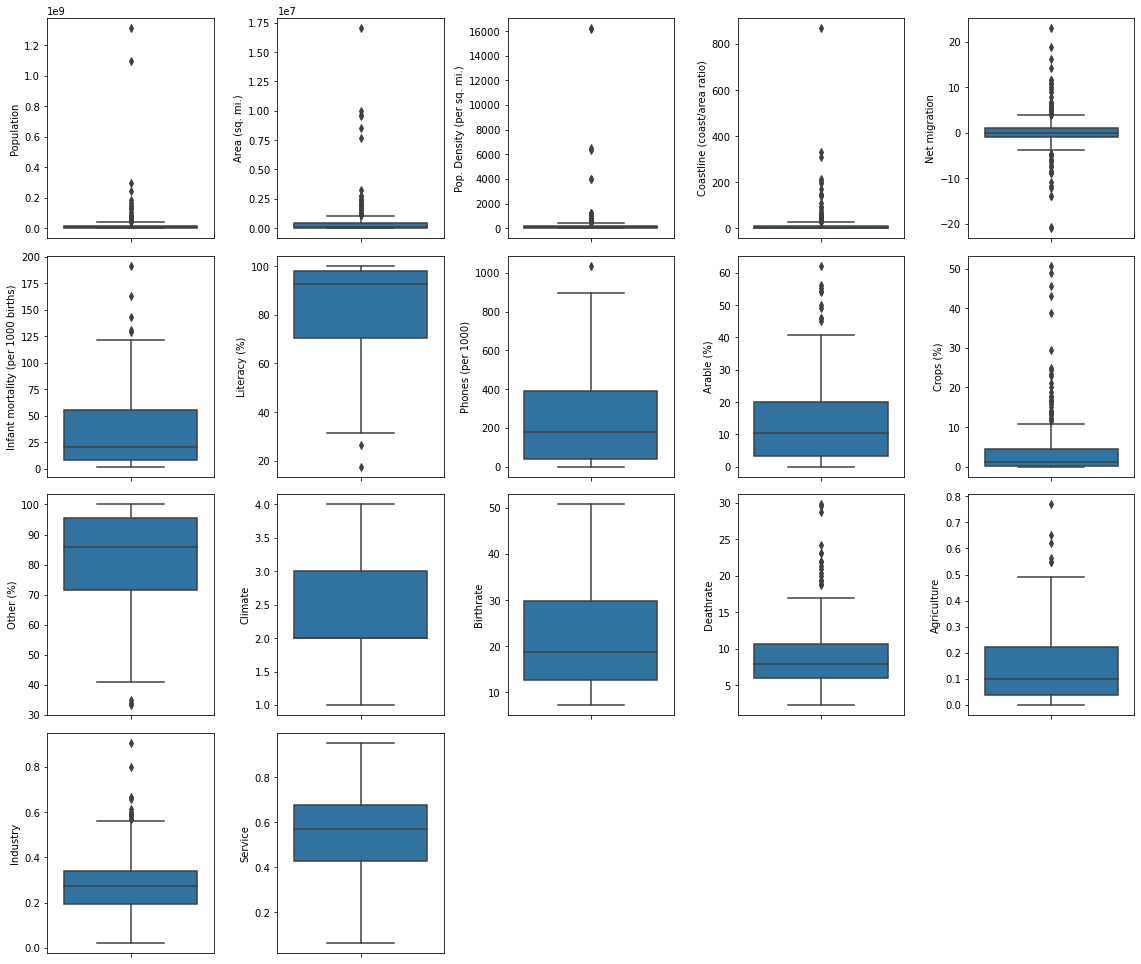

In [14]:
#solution 
#test distribution and outliers of features to find out the best value that will be used to fill nulls

numeric_features = ['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)','Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate','Agriculture', 'Industry', 'Service']
fig = plt.figure(figsize=(16,30))

for i in range(len(numeric_features)):
    fig.add_subplot(9, 5, i+1)
    sns.boxplot(y=df[numeric_features[i]])
plt.tight_layout()
plt.show()

conclusion from boxplot <br>
a few outliers(<10 outliers) :birthrate, service , phones, other, climate , density, literacy, arable, agriculture, industry <br>
alot of outliers(>=10 outliers): population, area, coastline_area_ratio, net_migration, crops, deathrate

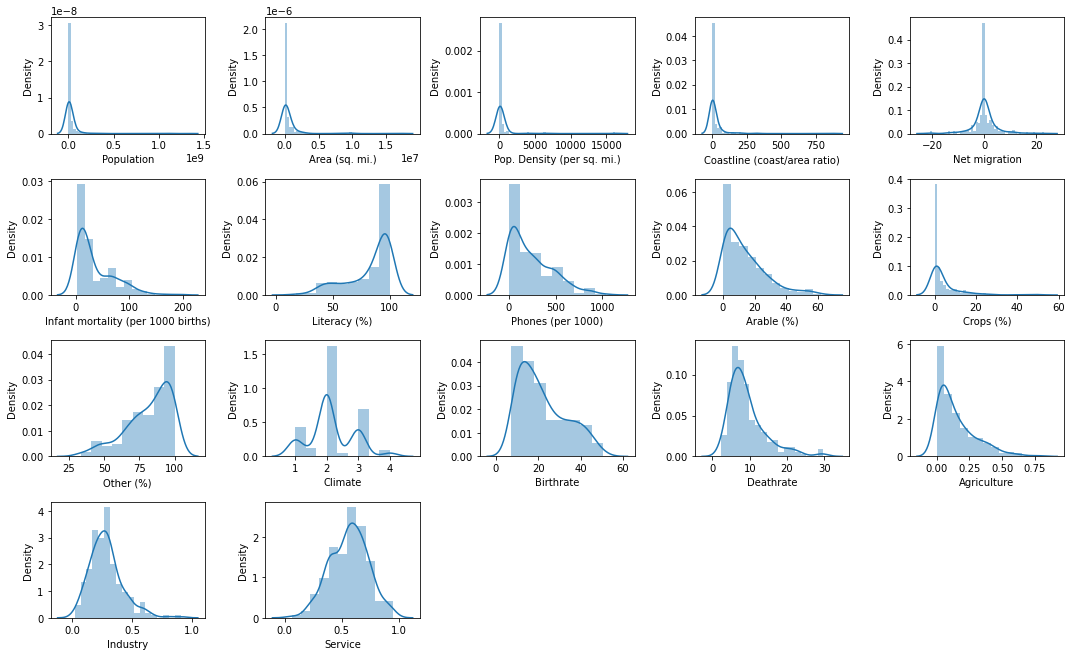

In [15]:
#plot histogram of distribution
fig = plt.figure(figsize=(15,20))
for i in range(len(numeric_features)):
    fig.add_subplot(9, 5, i+1)
    sns.distplot(df[numeric_features[i]])
plt.tight_layout()
plt.show()

## Fill Nulls 

In [16]:
df['Net migration'].fillna(0, inplace=True)

df['Infant mortality (per 1000 births)'].fillna(0, inplace=True)

df['GDP ($ per capita)'].fillna(2500, inplace=True)

df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('median'), inplace= True)

df['Phones (per 1000)'].fillna(df.groupby('Region')['Phones (per 1000)'].transform('median'), inplace= True)

df['Arable (%)'].fillna(0, inplace=True)

df['Crops (%)'].fillna(0, inplace=True)

df['Other (%)'].fillna(0, inplace=True)

df['Climate'].fillna(0, inplace=True)

df['Agriculture'].fillna(df.groupby('Region')['Agriculture'].transform('mean'), inplace= True)

df['Industry'].fillna(df.groupby('Region')['Industry'].transform('mean'), inplace= True)

df['Service'].fillna(df.groupby('Region')['Service'].transform('mean'), inplace= True)

df['Birthrate'].fillna(df.groupby('Region')['Birthrate'].transform('mean'), inplace= True)

df['Deathrate'].fillna(df.groupby('Region')['Deathrate'].transform('median'), inplace= True)

In [17]:
#test
df.isna().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

**Third issue**<br>
**Encoging region feature**

In [18]:

from sklearn import preprocessing 

le = preprocessing.LabelEncoder()
df['Region'] = le.fit_transform(df.Region.values)
df['Region'] = le.fit_transform(df['Region'])



In [19]:
#test encoding
df['Region'].value_counts()

9     51
4     45
10    28
0     28
8     21
5     16
3     12
2     12
6      6
7      5
1      3
Name: Region, dtype: int64

In [20]:
df = df.drop(columns="Country")

In [21]:
df.head()

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380000,0.240000,0.380000
1,3,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232000,0.188000,0.579000
2,6,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101000,0.600000,0.298000
3,8,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.175125,0.215250,0.608937
4,10,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.044480,0.246083,0.714625


## 4. Features transformation


In [22]:
from sklearn import preprocessing

#scaler = preprocessing.StandardScaler().fit(df)

#scaler1 = preprocessing.MinMaxScaler().fit(df)

scaler2 = preprocessing.RobustScaler().fit(df)

x_scaled = scaler2.transform(df)

x_scaled




array([[-1.00000000e+00,  1.53984609e+00,  1.28304399e+00, ...,
         1.57422969e+00, -1.51442308e-01, -8.38574423e-01],
       [-4.00000000e-01, -7.06523158e-02, -1.32334927e-01, ...,
         7.45098039e-01, -5.26442308e-01, -4.19287212e-03],
       [ 2.00000000e-01,  1.64963963e+00,  5.25007234e+00, ...,
         1.12044818e-02,  2.44471154e+00, -1.18238994e+00],
       ...,
       [ 0.00000000e+00,  9.77083758e-01,  1.00962226e+00, ...,
         2.01680672e-01,  1.52163462e+00, -7.84067086e-01],
       [ 8.00000000e-01,  3.93608297e-01,  1.52348950e+00, ...,
         6.77871148e-01,  2.09134615e-01, -3.81551363e-01],
       [ 8.00000000e-01,  4.36679141e-01,  6.95346249e-01, ...,
         4.48179272e-01, -1.29807692e-01, -4.19287212e-03]])

## 5. Training and hyperparamter tuning<br>



### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters


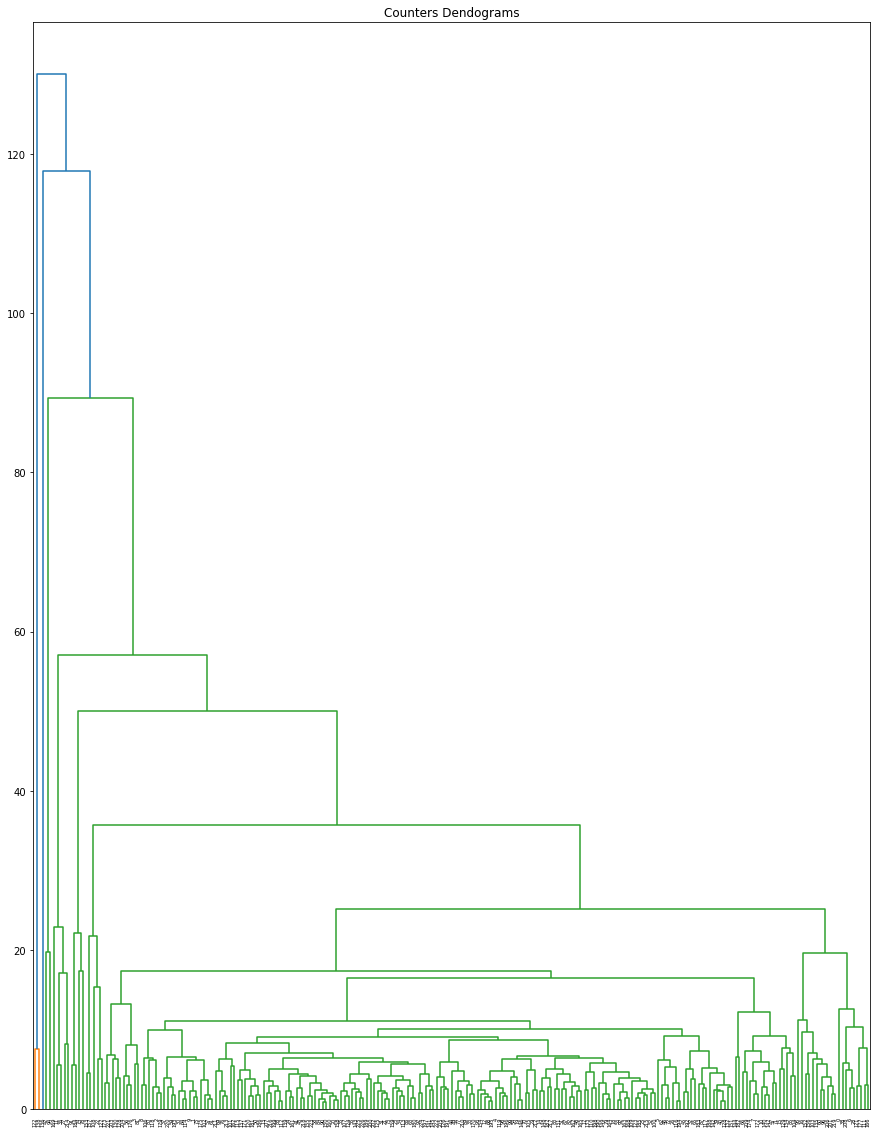

In [23]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 20))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=x_scaled , method='complete', metric='euclidean'),orientation='top')

**i try method (average , complete , single  ,centroid)**<br>
**results from average and complete was close and logical (3 classes)**<br>
**single was very different (5 or 6 classes)**<br>
**centroid was close to average (4 classes)**<br>


# Model training and assesment

In [24]:
#training
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 2 ,linkage = 'average').fit(x_scaled)

from sklearn.metrics import silhouette_score

score = silhouette_score(x_scaled , model.labels_)

print(score)


0.8878974120359692


after trying different number of clusters from 2 to 10 <br>
i found 3 is the logical number and also give a good score <br>

then i try to change the linkage in model with thw same number of clusters <br>
average -> 0.887 <br>
single -> 0.887 <br>
complete -> 0.887 <br>
ward -> 0.86 <br>

So i decided to choose (3) clusters and (average) linkage 



# DBSCAN

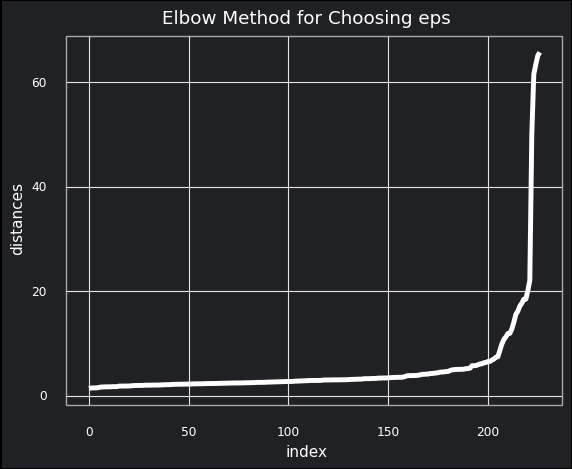

<ggplot: (99451586145)>

In [25]:
from sklearn.neighbors import NearestNeighbors
from plotnine import *
from sklearn.cluster import DBSCAN

mins = 3
nn = NearestNeighbors(mins + 1)

nn.fit(x_scaled)

distances, neighbors = nn.kneighbors(x_scaled)

distances = np.sort(distances[:, mins], axis = 0)

#plot the distances
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt


In [26]:
db1 = DBSCAN(eps = 5.27 , min_samples = 3).fit(x_scaled)

print(set(db1.labels_))
print(sum(db1.labels_ == -1))

score1 = silhouette_score(x_scaled[ db1.labels_ != -1], db1.labels_[ db1.labels_!=-1])
print(score1)

{0, 1, -1}
25
0.4248951645863872


i try so many values for min samples and epsilon to reach the minimum noise and good score at the same time <br>
the best score was 0.42 with eps = 5.27 and min_sanples = 3 and only 2 clusters <br> 

# KMeans

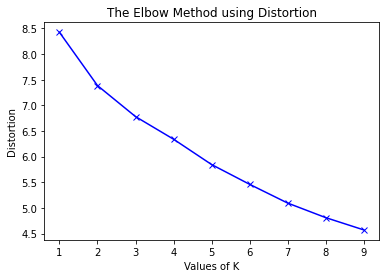

In [27]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(x_scaled)
    
 
    distortions.append(sum(np.min(cdist(x_scaled, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / x_scaled.shape[0])
for key, val in mapping1.items():
    print(f'{key} : {val}')

import matplotlib.pyplot as plt1

plt1.plot(K, distortions, 'bx-')
plt1.xlabel('Values of K')
plt1.ylabel('Distortion')
plt1.title('The Elbow Method using Distortion')
plt1.show()


In [28]:
from sklearn.cluster import KMeans
km = KMeans(2).fit(x_scaled)
score2 = silhouette_score(x_scaled, km.labels_)
print(score2)

0.8878974120359692


Kmeans reach almost the same score (0.86) of the hierarchical model with the same number of clusters(3) <br>

changing the number of clusters (2) improved th score (0.88)

## Conclusion

after testing the 3 models and trying to find the best parameters <br>
with the same number of clusters (3) <br>



## Hierarchical -> 0.88
## KMeans -> 0.88
## DBSCAN -> 0.42


## 6. <a name="6">improvement ideas</a>


- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

# Using PCA

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
x_new = pca.fit_transform(x_scaled)

print(pca.explained_variance_ratio_.sum())
print(pca.explained_variance_ratio_)

0.8760374533478422
[0.46660891 0.22426887 0.18515967]


In [30]:
#check the shape on the new data after running PCA on original X_scaled data
x_new.shape

(227, 3)

to determine the best number of component,I have tried many values from 2 to 10 <br>
using only 3 components can explain 0.88 of variance which is acceptable and reduce number of dimensions from 19 to only 3

# Test the 3 models again after using PCA

## KMeans

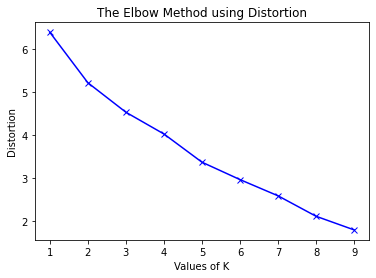

In [31]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(x_new)
    
 
    distortions.append(sum(np.min(cdist(x_new, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / x_new.shape[0])
for key, val in mapping1.items():
    print(f'{key} : {val}')

import matplotlib.pyplot as plt1

plt1.plot(K, distortions, 'bx-')
plt1.xlabel('Values of K')
plt1.ylabel('Distortion')
plt1.title('The Elbow Method using Distortion')
plt1.show()



In [32]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 2 , random_state = 42).fit(x_new)

score2 = silhouette_score(x_new, km.labels_)
print(score2)

0.9233507647113335


PCA improved the score of KMeans from 0.86 to 0.90 with the same number of clusters(3) <br>
After changing number of clusters to (2) -> score increased to 0.92 but i always use 3 clusters to compare between models <br>



## Hierarchical

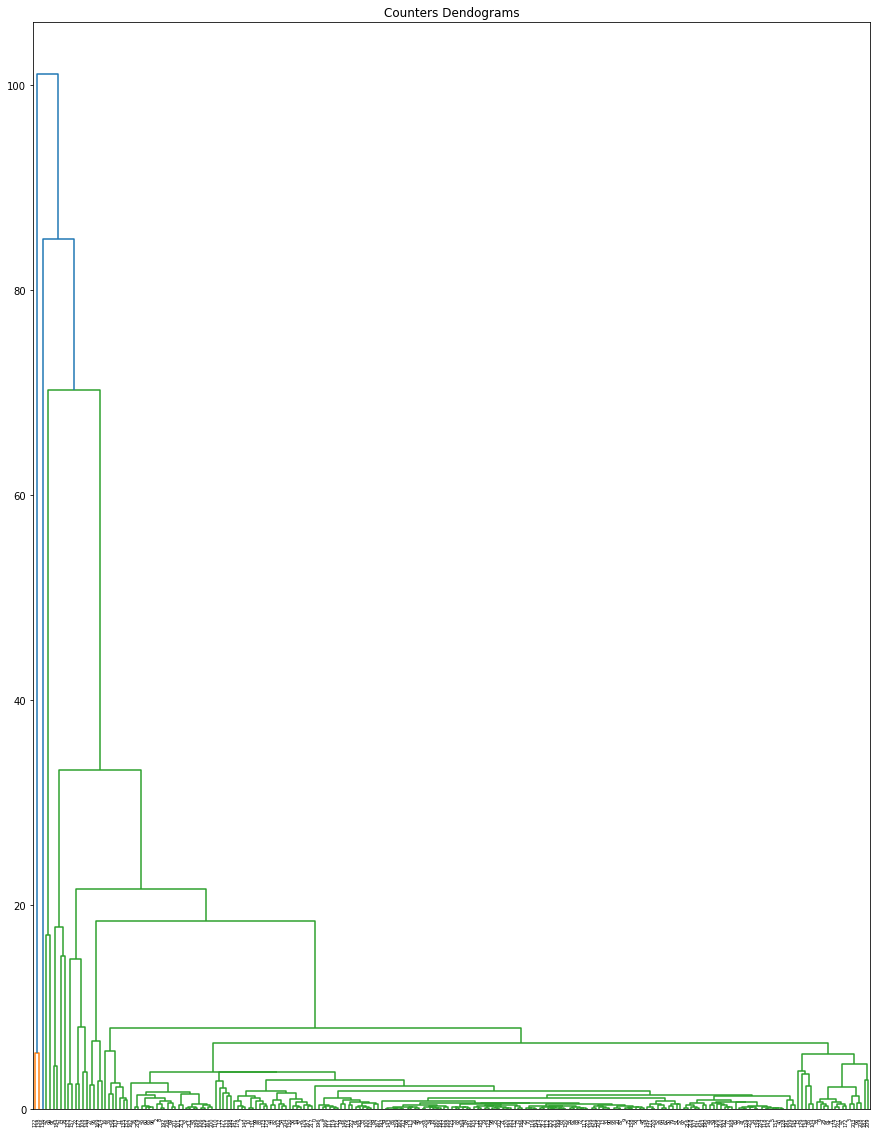

In [33]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt1

plt1.figure(figsize=(15, 20))
plt1.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=x_new , method='average', metric='euclidean'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [34]:
#training
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 2 ,linkage = 'average').fit(x_new)

from sklearn.metrics import silhouette_score

score = silhouette_score(x_new , model.labels_)

print(score)


0.9233507647113335


PCA improved the score of Hierarchical from 0.87 to 0.91 with the same number of clusters(3) <br>
After changing number of clusters to (2) -> score increased to 0.92 but i always use 3 clusters to compare between models <br>




## DBSCAN

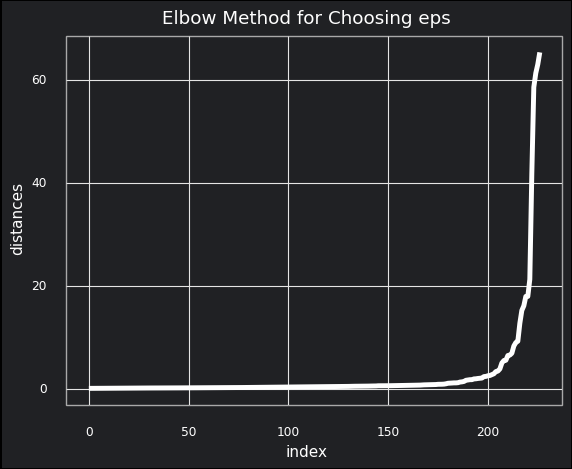

<ggplot: (99452316019)>

In [35]:
from sklearn.neighbors import NearestNeighbors
from plotnine import *
from sklearn.cluster import DBSCAN

mins = 3
nn = NearestNeighbors(mins + 1)

nn.fit(x_new)

distances, neighbors = nn.kneighbors(x_new)

distances = np.sort(distances[:, mins], axis = 0)

#plot the distances
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt


In [36]:
db1 = DBSCAN(eps = 4.84 , min_samples = 3).fit(x_new)

print(set(db1.labels_))
print(sum(db1.labels_ == -1))

score1 = silhouette_score(x_new[ db1.labels_ != -1], db1.labels_[ db1.labels_!=-1])
print(score1)

{0, 1, -1}
13
0.8030334887885595


PCA improved the score of DBSCAN from  only 0.42 to 0.80 with 2 clusters<br>
Also the noise decreased from 25 to only 13  <br>



# Conclusion of using PCA

Using PCA with number of components improved the score of the 3 models <br>

KMeans changed from 0.86 to 0.92 <br>
Hierarchical changed from 0.87 to 0.92 <br>
DBSCAN changed from 0.42 to 0.80 <br>

# Try different transformation techniques

To scale/normalize the data,I have used 3 methods <br>
1) the best preprocessing was by using RobustScaler due to it can handle outliers <br>
2) then StandardScaler came in second place score less than RobustScaler <br>
3) At the end MinMaxScaler came with the lowest score Especially with DBSCAN